In [1]:
# this set of code gets 9 Vanguard Funds closing prices from 1-1-2-15 to 12-31-2019, which is the
# timeframe that the real estate data covers. (This treatment ignores dividends.)
# the code creates a function that will get data from alpaca for a given set of stocks over a certain time period.
# the first time the function is run it gets data that covers the same time frame that the real estate data covers.

# INSERT FOLLOWING TEXT INTO README

# In order to compare the perfomace of the Real Estate markets analyzed we looked at nine of the core Vanguard Mutual Funds.
# We looked at those because they represent investments that are often made by a typical investor, and because they represent
# several different ways of capturing the performance of large parts of the market. The first one, Vangaurd Total Stock Market ETF
# (VTI) attempts to capture the performance of the entire stock market by using the CRSP Total Market Index. The Vanguard Total Inernational
# Stock Index (VXUS) uses an index that tracks the performance of all stock markets outside the US. Vanguard's Total Bond Market ETF 
# (BND) is intended to track the performance of the entire US Bond market and is identified as a stable long term investment that's a
# good way to diversify equity investments. Vanguard Total International Bond ETF (BNDX) attempts to mirror the performance of an index 
# that represents the non-US investment grade bond market hedged in US Dollars. The next set of funds looks at a smaller part of the US Market. Vanguard Growth ETF (VUG) replecates the performance of 
# the CRSP Large Cap Growth Index, the Vanguard Small-Cap ETF (VB) mirrors the performance of a CRSP index of stocks with a small market cap, Vanguard S&P 500 ETF (VOO)
# track the S&P 500, and the Vanguard Russell 1000 Growth ETF (VONG) mirros an Russel index that tracks stock with good potential for long term growth and 
# is volitaile but is said to have excellent long term growth potential.  All of the funds mentioned here are passively managed. The descriptions of the objectives of the funds
# are taken from Vanguard's website, and CRSP is the Center for Research in Stock Prices. 

# This line is needed to make the code work with my faulty Jupyter Notebooks, which don't always have programs installed
# in the base environment.

! pip install alpaca-trade-api

# Import the necessary libraries. 

import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import alpaca_trade_api as tradeapi
%matplotlib inline




Bad key "text.kerning_factor" on line 4 in
/Users/aaronbsechler/opt/anaconda3/envs/pyvizenv2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# import the .env reader

from dotenv import load_dotenv
load_dotenv()

# Create a function that pulls stock closing prices from Alpaca. The three inputs are the tickers you're interested in, the start date,
# and the end date.

def alpaca_data_puller(ticker_input, start_date_input, end_date_input):
    
    # Set Alpaca API key and secret
    alpaca_api_key = os.getenv("APCA_API_KEY")
    alpaca_secret_key = os.getenv("APCA_SECRET_KEY")

    # Create the Alpaca API object
    api = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version="v2")

    ticker = ticker_input

    timeframe = "1D"

    start_date = pd.Timestamp(start_date_input, tz='America/New_York').isoformat()
    end_date = pd.Timestamp(end_date_input, tz='America/New_York').isoformat()

    new_df = api.get_barset(
         ticker,
         timeframe,
         limit=None,
         start=start_date,
         end=end_date,
         after=None,
         until=None,
     ).df

    # Drop unnecessary columns
    new_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)

    # Drop Nulls

    new_df.dropna(inplace=True)
    
    return new_df
    

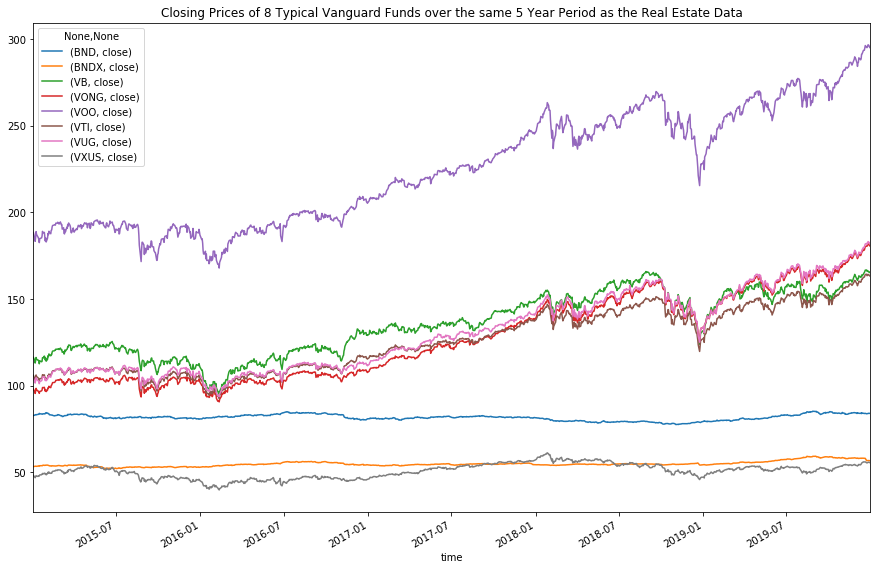

In [3]:
# run the alpaca_data_puller function to pull the data for the 8 Vanguard funds for the time frame that the real estate
# data covers

eight_vanguard_funds = ["VTI", "VXUS", "BND", "BNDX", "VUG", "VB", "VOO", "VONG"]

vanguard_comparison_df = alpaca_data_puller(eight_vanguard_funds, '2015-01-01', '2019-12-31')

# vanguard_comparison_df.head()

# Graph the Closing Prices - CREATE A KEY FOR THE GRAPH

plot_title = f"Closing Prices of 8 Typical Vanguard Funds over the same 5 Year Period as the Real Estate Data"

vanguard_comparison_df.plot(legend=("best"), title=plot_title, figsize=(15,10))



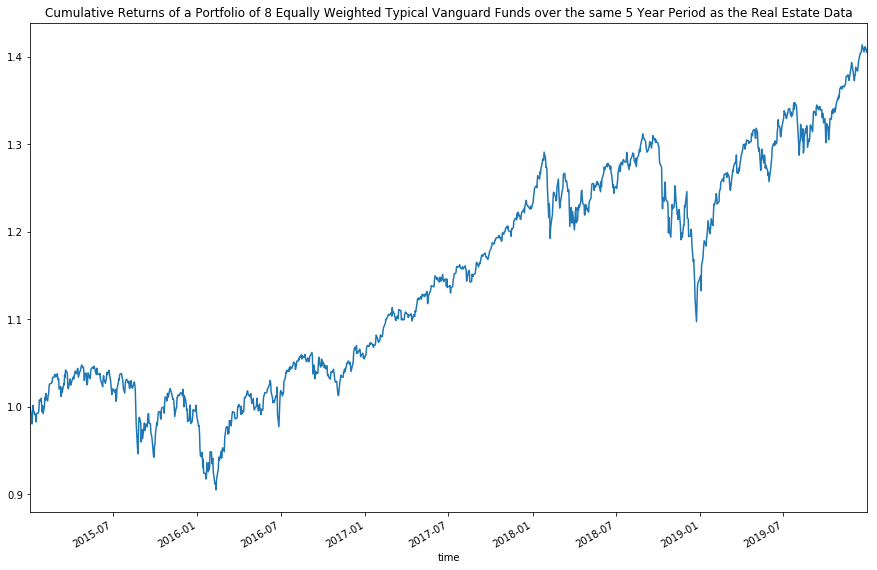

In [4]:
# Graph the performane of an equally weighted portfolio over the 5 year period

vanguard_comparison_daily_returns = vanguard_comparison_df.pct_change()

weights = [.125, .125, .125, .125, .125, .125, .125, .125]

portfolio_daily_returns = vanguard_comparison_daily_returns.dot(weights)

vanguard_portfolio_cumulative_returns = (1 + portfolio_daily_returns.fillna(0)).cumprod()

plot_title = f"Cumulative Returns of a Portfolio of 8 Equally Weighted Typical Vanguard Funds over the same 5 Year Period as the Real Estate Data"

vanguard_portfolio_cumulative_returns.plot(legend=(), title=plot_title, figsize=(15,10))

In [5]:
# Graph the Sharpe ratios for each stock and the portfolio

In [6]:
# Graph the beta of the stocks - this isn't as useful as it often is because the funds try to capture the US market, but it does tes the 
# efficacy of the data (and Vanguards attempt to marry the market.) OOO is supposed to provide the same return as the S&P five hundered
# and should have a beta of one. do this for each stock and the portfolio

This section allows the user to create their own custom portfolio stocks and compare them to the Vanguard funds. This section will take as many inputs as the user wants, but the monte carlo anlysis will only display the first eight stocks. How many would you like to display? 2
Enter a valid stock ticker. If an invalid stock ticker is entered the progam will drop the data and nothing will be displayed for that ticker. AAPL
What percentage of the portfolio would you like that stock to comprise? .5
Enter a valid stock ticker. If an invalid stock ticker is entered the progam will drop the data and nothing will be displayed for that ticker. GOOG
What percentage of the portfolio would you like that stock to comprise? .5


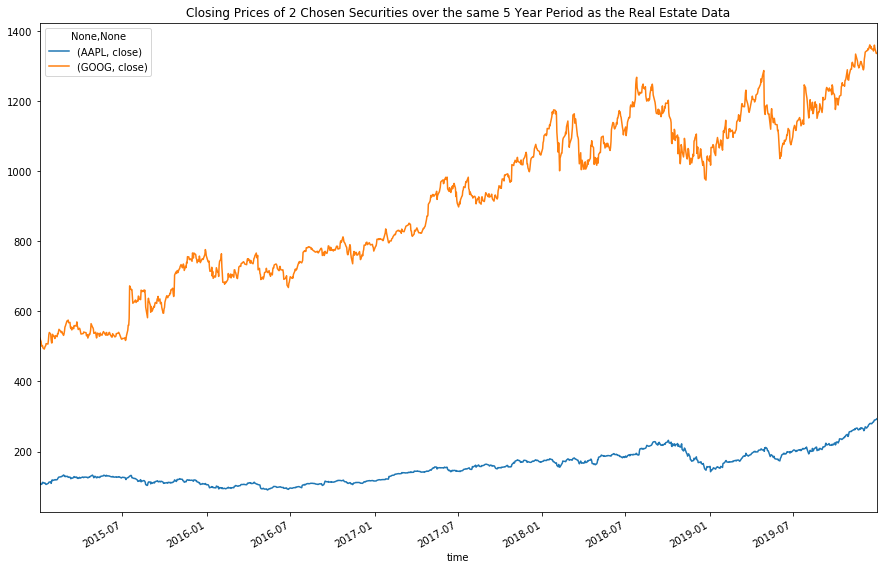

In [9]:
# Create the custom portfolio and custom weights - this allows the user to create a custom portolio of  eight stocks weighted the way they
# want it to be and see it's performance. Compatability with the monte carlo anlysis in the next section is the limiting factor. the input function
# only takes in strings so the code changes the input to a int or float as needed.

number_of_stocks = input("This section allows the user to create their own custom portfolio stocks and compare them to the Vanguard funds. This section will take as many inputs as the user wants, but the monte carlo anlysis will only display the first eight stocks. How many would you like to display?")

number_of_stocks = int(number_of_stocks)

custom_ticker = []
custom_weight = []

for i in range(0, number_of_stocks):
    ticker = input('Enter a valid stock ticker. If an invalid stock ticker is entered the progam will drop the data and nothing will be displayed for that ticker.')
    weight = input('What percentage of the portfolio would you like that stock to comprise?')
    custom_ticker.append(ticker)
    weight = float(weight)
    custom_weight.append(weight)

custom_comparison_df = alpaca_data_puller(custom_ticker, '2015-01-01', '2019-12-31')

# dropping the nulls will prevent an error if an invalid stock ticker is entered.

custom_comparision_df = custom_comparison_df.dropna()

plot_title = f"Closing Prices of {number_of_stocks} Chosen Securities over the same 5 Year Period as the Real Estate Data"

custom_comparison_df.plot(legend=('best'), title=plot_title, figsize=(15,10))


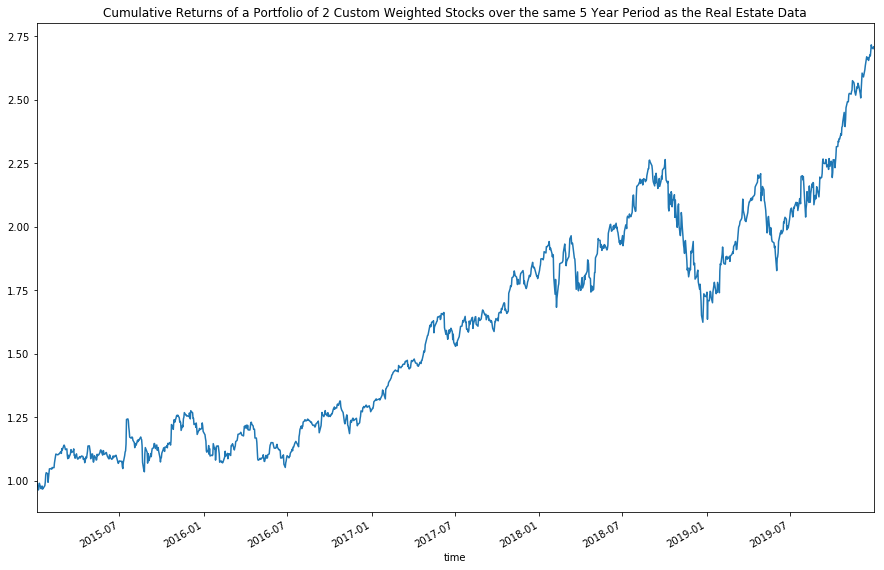

In [10]:
custom_daily_returns = custom_comparison_df.pct_change()

custom_portfolio_daily_returns = custom_daily_returns.dot(custom_weight)

custom_portfolio_cumulative_returns = (1 + custom_portfolio_daily_returns.fillna(0)).cumprod()

plot_title = f"Cumulative Returns of a Portfolio of {number_of_stocks} Custom Weighted Stocks over the same 5 Year Period as the Real Estate Data"

custom_portfolio_cumulative_returns.plot(legend=(), title = plot_title, figsize=(15,10))
                                         

In [ ]:
# Graph the beta for each custom stock & portfolio as a whole

In [ ]:
# Graph the Sharpe ratios for each stock & portfolio as a whole

In [39]:
# the comparision_df stops at the end of 2019 because the real estate data does, this set of code creates a new df
# called monte_carlo_df that takes the last five years of data that's available to make the monte carlo model more accurate.

vanguard_mc_df = alpaca_data_puller(eight_vanguard_funds, pd.Timestamp.today() - pd.Timedelta('1260 days'), pd.Timestamp.today())

vanguard_mc_df.tail() 

# this data is not graphed because it's used to predict the future in the next section, and it covers a different time period
# than the real estate data.

,BND,BNDX,VB,VONG,VOO,VTI,VUG,VXUS
,close,close,close,close,close,close,close,close
time,,,,,,,,
2020-08-18 00:00:00-04:00,88.580,58.0133,158.085,221.84,311.13,171.96,227.00,53.580
2020-08-19 00:00:00-04:00,88.440,58.0000,157.710,221.00,309.91,171.26,225.80,53.250
2020-08-20 00:00:00-04:00,88.585,58.0300,157.000,223.56,310.81,171.79,228.18,53.120
2020-08-21 00:00:00-04:00,88.700,58.0450,156.390,224.80,311.90,172.18,229.47,52.975
2020-08-24 00:00:00-04:00,88.670,58.0600,158.170,225.55,315.09,173.82,230.85,53.590


In [45]:
# now that we have a data frame with the last five years closing prices this set of code predicts prices for the 
# next thirty years.

# this creates a function that runs Monte Carlo Analysis whose input is an eight column
# data frame.

def monte_carlo_function(df, ticker, weights):

    daily_returns = df.pct_change()
    
    zero_name = ticker[0]
    one_name = ticker[1]
    two_namer = ticker[2]
    three_name = ticker[3]
    four_name = ticker[4]
    five_name = ticker[5]
    six_name = ticker[6]
    seven_name = ticker[7]

# Calculate average daily returns. 

    avg_daily_return_zero = daily_returns.mean()['[zero_name]']['close']
    avg_daily_return_one = daily_returns.mean()['[one_name]']['close']
    avg_daily_return_two = daily_returns.mean()['[two_name]']['close']
    avg_daily_return_three = daily_returns.mean()['[three_name]']['close']
    avg_daily_return_four = daily_returns.mean()['[four_name]']['close']
    avg_daily_return_five = daily_returns.mean()['[five_name]']['close']
    avg_daily_return_six = daily_returns.mean()['[six_name]']['close']
    avg_daily_return_seven = daily_returns.mean()['[seven_name]']['close']



# Compute daily volatility. the #'d out code prints the results.

    std_dev_return_zero = daily_returns.std()['[zero_name]']['close']
    std_dev_return_one = daily_returns.std()['[one_name]']['close']
    std_dev_return_two = daily_returns.std()['[two_name]'['close']
    std_dev_return_three = daily_returns.std()['[three_name]']['close']
    std_dev_return_four = daily_returns.std()['[four_name]']['close']
    std_dev_return_five = daily_returns.std()['[five_name]']['close']
    std_dev_return_six = daily_returns.std()['[six_name]']['close']
    std_dev_return_seven = daily_returns.std()['[seven_name]']['close']


# Set the last price to begin the Monte Carlo simulation.

    zero_last_price = df['[zero_name]'][-1]
    one_last_price = df['[one_name]'][-1]
    two_last_price = df['[two_name]'][-1]
    three_last_price = df['[three_name]'][-1]
    four_last_price = df['[four_name]'}][-1]
    five_last_price = df['[five_name]'][-1]
    six_last_price = df['[six_name]'][-1]
    seven_last_price = df['[seven_name]'][-1]


# Setup the Monte Carlo Parameters
    number_simulations = 5
    number_records = 252 * 30
    monte_carlo = pd.DataFrame()

# Run the Monte Carlo Simulation



# Initialize empty DataFrame to hold simulated prices for each simulation, and declare empty lists for the individual stock prices.
    simulated_price_df = pd.DataFrame()
    simulated_zero_prices = []
    simulated_one_prices = []
    simulated_two_prices = []
    simulated_three_prices = []
    simulated_four_prices = []
    simulated_five_prices = []
    simulated_six_prices = []
    simulated_seven_prices = []


# Run the simulation of projecting stock prices for the next trading year, `500` times
    for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of each mutual fund.
        simulated_zero_prices = [zero_last_price]
        simulated_one_prices = [one_last_price]
        simulated_two_prices = [vb_two_price]
        simulated_three_prices = [vong_three_price]
        simulated_four_prices = [four_last_price]
        simulated_five_prices = [five_last_price]
        simulated_six_prices = [six_last_price]
        simulated_seven_prices = [seven_last_price]

    
    # Simulate the returns for 252 days
        for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
            simulated_zero_price = simulated_zero_prices[-1] * (1 + np.random.normal(avg_daily_return_zero, std_dev_return_zero))
            simulated_one_price = simulated_one_prices[-1] * (1 + np.random.normal(avg_daily_return_one, std_dev_return_one))
            simulated_two_price = simulated_two_prices[-1] * (1 + np.random.normal(avg_daily_return_two, std_dev_return_two))
            simulated_three_price = simulated_three_prices[-1] * (1 + np.random.normal(avg_daily_return_three, std_dev_return_three))
            simulated_four_price = simulated_four_prices[-1] * (1 + np.random.normal(avg_daily_return_four, std_dev_return_four))
            simulated_five_price = simulated_five_prices[-1] * (1 + np.random.normal(avg_daily_return_five, std_dev_return_five))
            simulated_six_price = simulated_six_prices[-1] * (1 + np.random.normal(avg_daily_return_six, std_dev_return_six))
            simulated_seven_price = simulated_seven_prices[-1] * (1 + np.random.normal(avg_daily_return_seven, std_dev_return_seven))
    
        
        # Append the simulated price to the list
            simulated_zero_prices.append(simulated_zero_price)
            simulated_one_prices.append(simulated_one_price)
            simulated_two_prices.append(simulated_two_price)
            simulated_three_prices.append(simulated_three_price)
            simulated_four_prices.append(simulated_four_price)
            simulated_five_prices.append(simulated_five_price)
            simulated_six_prices.append(simulated_six_price)
            simulated_seven_prices.append(simulated_seven_price)

    
    # Append the simulated prices of each simulation to DataFrame
        simulated_price_df['[zero_name]'] = pd.Series(simulated_zero_prices)
        simulated_price_df['[one_name]'] = pd.Series(simulated_one_prices)
        simulated_price_df['[two_name]'] = pd.Series(simulated_two_prices)
        simulated_price_df['[three_name]'] = pd.Series(simulated_three_prices)
        simulated_price_df['[four_name]'] = pd.Series(simulated_four_prices)
        simulated_price_df['[five_name]'] = pd.Series(simulated_five_prices)
        simulated_price_df['[six_name]'] = pd.Series(simulated_six_prices)
        simulated_price_df['[seven_name]'] = pd.Series(simulated_seven_prices)
    
    
    # Calculate the daily returns of simulated prices
        simulated_daily_returns = simulated_price_df.pct_change()
                                             
        portfolio_daily_returns = simulated_daily_returns.dot(weights)
                                             
        portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()                                    
        
        return simuluated_daily_returns
                                             
# Calling this function should produce the weighted return of the entire portfolio. In the Vanguard case I have assumed equal weights.
                                             
balanced_weights = [.125, .125, .125, .125, .125, .125, .125, .125]                                            
    
vg_simulated_daily_returns = monte_carlo_function(vanguard_mc_df, eight_vanguard_funds, balanced_weights)
    
# this shows the projected performance of all 8 funds.

plot_title = f"{n+1} Simulations of 8 Typical Vanguard Funds over the Next 30 Years"
simulated_daily_returns.plot(legend=None, title=plot_title, figsize=(10,15))


SyntaxError: invalid syntax (<ipython-input-45-5ed4f2b9efb1>, line 38)

In [46]:
# show the confidence interval for each stock


# Select the last row for the cumulative returns (cumulative returns at 30 years)

last_row_simulated_ending_portfolio_values = vg_simulated_daily_returns.iloc[-1]

print("For the Vangaurd Portfolio the 90% confidence level is printed below.")

print(last_row_simulated_ending_portfolio_values)

confidence_interval = last_row_simulated_ending_portfolio_values.quantile(q=[0.05, 0.95])
print(confidence_interval)

In [ ]:
plot_title = ("Distriution of the Simulated Ending Vanguard Portfolio Values")

last_row_simulated_ending_portfolio_values.plot(kind='hist', bins=20, title=plot_title)

In [ ]:
# show the predicted performance of the custom portfoli0 as a whole
custom_simulated_daily_returns = monte_carlo_function(custom_comparison_df, custom_ticker, custom_weights)

plot_title = f"{n+1} Simulations of 8 User Selected Stocks over the Next 30 Years"
simulated_daily_returns.plot(legend=None, title=plot_title, figsize=(10,15))

In [ ]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)

custom_last_row_simulated_ending_portfolio_values = custom_simulated_daily_returns.iloc[-1]

print("For the Vangaurd Portfolio the 90% confidence level is printed below.")

print(custom_last_row_simulated_ending_portfolio_values)

confidence_interval = custom_last_row_simulated_ending_portfolio_values.quantile(q=[0.05, 0.95])
print(confidence_interval)

In [ ]:
plot_title = ("Distriution of the Custom Ending Vanguard Portfolio Values")

custom_last_row_simulated_ending_portfolio_values.plot(kind='hist', bins=20, title=plot_title)